In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, classification_report, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

import functions

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Data

In [5]:
df = pd.read_csv('../data/dataset_with_vec.csv')
df.head(2)

,subject_id,gender,anchor_age,lengths_of_1st_admission,lengths_of_2nd_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,aspirin ec Sum,benzonatate Sum,bisacodyl Sum,captopril Sum,carvedilol Sum,ciprofloxacin iv Sum,clonazepam Sum,d5 1/2ns Sum,d5ns Sum,diltiazem Sum,diltiazem extended-release Sum,famotidine Sum,fluoxetine Sum,furosemide Sum,glucagon Sum,hydrochlorothiazide Sum,ibuprofen Sum,influenza vaccine quadrivalent Sum,influenza virus vaccine Sum,isosorbide mononitrate (extended release) Sum,labetalol Sum,lamotrigine Sum,lidocaine 1% (for picc/midline insertions) Sum,lisinopril Sum,losartan potassium Sum,lr Sum,magnesium oxide Sum,metformin (glucophage) Sum,metoprolol succinate xl Sum,midazolam Sum,mirtazapine Sum,mycophenolate mofetil Sum,neomycin-polymyxin-bacitracin Sum,nitroglycerin sl Sum,olanzapine Sum,olanzapine (disintegrating tablet) Sum,ondansetron Sum,ondansetron odt Sum,oxycodone sr (oxycontin) Sum,pneumococcal 23-valent polysaccharide vaccine Sum,pneumococcal vac polyvalent Sum,potassium chl 20 meq / 1000 ml d5 1/2 ns Sum,potassium chloride (powder) Sum,potassium chloride replacement (critical care and oncology) Sum,potassium chloride replacement (oncology) Sum,pravastatin Sum,prochlorperazine Sum,quetiapine fumarate Sum,ramelteon Sum,ranitidine Sum,rosuvastatin calcium Sum,sodium chloride 0.9% flush Sum,soln Sum,sterile water Sum,sw Sum,tamsulosin Sum,torsemide Sum,tramadol Sum,trazodone Sum,valsartan Sum,zolpidem tartrate Sum,0.45% sodium chloride Average,1/2 ns Average,allopurinol Average,alprazolam Average,amiodarone Average,amlodipine Average,aspirin Average,aspirin ec Average,benzonatate Average,bisacodyl Average,captopril Average,carvedilol Average,ciprofloxacin iv Average,clonazepam Average,d5 1/2ns Average,d5ns Average,diltiazem Average,diltiazem extended-release Average,famotidine Average,fluoxetine Average,furosemide Average,glucagon Average,hydrochlorothiazide Average,ibuprofen Average,influenza vaccine quadrivalent Average,influenza virus vaccine Average,isosorbide mononitrate (extended release) Average,labetalol Average,lamotrigine Average,lidocaine 1% (for picc/midline insertions) Average,lisinopril Average,losartan potassium Average,lr Average,magnesium oxide Average,metformin (glucophage) Average,metoprolol succinate xl Average,midazolam Average,mirtazapine Average,mycophenolate mofetil Average,neomycin-polymyxin-bacitracin Average,nitroglycerin sl Average,olanzapine Average,olanzapine (disintegrating tablet) Average,ondansetron Average,ondansetron odt Average,oxycodone sr (oxycontin) Average,pneumococcal 23-valent polysaccharide vaccine Average,pneumococcal vac polyvalent Average,potassium chl 20 meq / 1000 ml d5 1/2 ns Average,potassium chloride (powder) Average,potassium chloride replacement (critical care and oncology) Average,potassium chloride replacement (oncology) Average,pravastatin Average,prochlorperazine Average,quetiapine fumarate Average,ramelteon Average,ranitidine Average,rosuvastatin calcium Average,sodium chloride 0.9% flush Average,soln Average,sterile water Average,sw Average,tamsulosin Average,torsemide Average,tramadol Average,trazodone Average,valsartan Average,zolpidem tartrate Average,"Acute kidney failure, unspecified",Acute posthemorrhagic anemia,"Alcohol abuse, unspecified","Anemia, unspecified","Anxiety disorder, unspecified","Anxiety state, unspecified",Aortocoronary bypass status,"Asthma, unspecified type, unspecified",Atherosclerotic heart disease of native coronary artery without angina pectoris,Atrial fibrillation,"Chronic airway obstruction, not elsewhere classified","Chronic kidney disease, unspecified","Chronic obstructive pulmonary disease, unspecified","Congestive heart failure, unspecified",Coronary atherosclerosis of native coronary artery,"Coronary atherosclerosis of unspecified type of vessel, native or graft",Dehydration,"Depressive disorder, not elsewhere classified","Diabetes me

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20658 entries, 0 to 20657
Columns: 516 entries, subject_id to doc2vec_299
dtypes: float64(439), int64(76), object(1)
memory usage: 81.3+ MB


In [7]:
df.shape

(20658, 516)

In [8]:
df.subject_id.nunique()

20658

In [9]:
df.describe()

,subject_id,gender,anchor_age,lengths_of_1st_admission,lengths_of_2nd_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,aspirin ec Sum,benzonatate Sum,bisacodyl Sum,captopril Sum,carvedilol Sum,ciprofloxacin iv Sum,clonazepam Sum,d5 1/2ns Sum,d5ns Sum,diltiazem Sum,diltiazem extended-release Sum,famotidine Sum,fluoxetine Sum,furosemide Sum,glucagon Sum,hydrochlorothiazide Sum,ibuprofen Sum,influenza vaccine quadrivalent Sum,influenza virus vaccine Sum,isosorbide mononitrate (extended release) Sum,labetalol Sum,lamotrigine Sum,lidocaine 1% (for picc/midline insertions) Sum,lisinopril Sum,losartan potassium Sum,lr Sum,magnesium oxide Sum,metformin (glucophage) Sum,metoprolol succinate xl Sum,midazolam Sum,mirtazapine Sum,mycophenolate mofetil Sum,neomycin-polymyxin-bacitracin Sum,nitroglycerin sl Sum,olanzapine Sum,olanzapine (disintegrating tablet) Sum,ondansetron Sum,ondansetron odt Sum,oxycodone sr (oxycontin) Sum,pneumococcal 23-valent polysaccharide vaccine Sum,pneumococcal vac polyvalent Sum,potassium chl 20 meq / 1000 ml d5 1/2 ns Sum,potassium chloride (powder) Sum,potassium chloride replacement (critical care and oncology) Sum,potassium chloride replacement (oncology) Sum,pravastatin Sum,prochlorperazine Sum,quetiapine fumarate Sum,ramelteon Sum,ranitidine Sum,rosuvastatin calcium Sum,sodium chloride 0.9% flush Sum,soln Sum,sterile water Sum,sw Sum,tamsulosin Sum,torsemide Sum,tramadol Sum,trazodone Sum,valsartan Sum,zolpidem tartrate Sum,0.45% sodium chloride Average,1/2 ns Average,allopurinol Average,alprazolam Average,amiodarone Average,amlodipine Average,aspirin Average,aspirin ec Average,benzonatate Average,bisacodyl Average,captopril Average,carvedilol Average,ciprofloxacin iv Average,clonazepam Average,d5 1/2ns Average,d5ns Average,diltiazem Average,diltiazem extended-release Average,famotidine Average,fluoxetine Average,furosemide Average,glucagon Average,hydrochlorothiazide Average,ibuprofen Average,influenza vaccine quadrivalent Average,influenza virus vaccine Average,isosorbide mononitrate (extended release) Average,labetalol Average,lamotrigine Average,lidocaine 1% (for picc/midline insertions) Average,lisinopril Average,losartan potassium Average,lr Average,magnesium oxide Average,metformin (glucophage) Average,metoprolol succinate xl Average,midazolam Average,mirtazapine Average,mycophenolate mofetil Average,neomycin-polymyxin-bacitracin Average,nitroglycerin sl Average,olanzapine Average,olanzapine (disintegrating tablet) Average,ondansetron Average,ondansetron odt Average,oxycodone sr (oxycontin) Average,pneumococcal 23-valent polysaccharide vaccine Average,pneumococcal vac polyvalent Average,potassium chl 20 meq / 1000 ml d5 1/2 ns Average,potassium chloride (powder) Average,potassium chloride replacement (critical care and oncology) Average,potassium chloride replacement (oncology) Average,pravastatin Average,prochlorperazine Average,quetiapine fumarate Average,ramelteon Average,ranitidine Average,rosuvastatin calcium Average,sodium chloride 0.9% flush Average,soln Average,sterile water Average,sw Average,tamsulosin Average,torsemide Average,tramadol Average,trazodone Average,valsartan Average,zolpidem tartrate Average,"Acute kidney failure, unspecified",Acute posthemorrhagic anemia,"Alcohol abuse, unspecified","Anemia, unspecified","Anxiety disorder, unspecified","Anxiety state, unspecified",Aortocoronary bypass status,"Asthma, unspecified type, unspecified",Atherosclerotic heart disease of native coronary artery without angina pectoris,Atrial fibrillation,"Chronic airway obstruction, not elsewhere classified","Chronic kidney disease, unspecified","Chronic obstructive pulmonary disease, unspecified","Congestive heart failure, unspecified",Coronary atherosclerosis of native coronary artery,"Coronary atherosclerosis of unspecified type of vessel, native or graft",Dehydration,"Depressive disorder, not elsewhere classified","Diabetes me

In [ ]:
# Clean the dataset
df = functions.clean_df(df)

In [11]:
df.isna().sum()

subject_id                  0
gender                      0
anchor_age                  0
lengths_of_1st_admission    0
lengths_of_2nd_admission    0
                           ..
doc2vec_295                 0
doc2vec_296                 0
doc2vec_297                 0
doc2vec_298                 0
doc2vec_299                 0
Length: 516, dtype: int64

In [12]:
df.shape

(20652, 516)

In [13]:
df.head()

,subject_id,gender,anchor_age,lengths_of_1st_admission,lengths_of_2nd_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,aspirin ec Sum,benzonatate Sum,bisacodyl Sum,captopril Sum,carvedilol Sum,ciprofloxacin iv Sum,clonazepam Sum,d5 1/2ns Sum,d5ns Sum,diltiazem Sum,diltiazem extended-release Sum,famotidine Sum,fluoxetine Sum,furosemide Sum,glucagon Sum,hydrochlorothiazide Sum,ibuprofen Sum,influenza vaccine quadrivalent Sum,influenza virus vaccine Sum,isosorbide mononitrate (extended release) Sum,labetalol Sum,lamotrigine Sum,lidocaine 1% (for picc/midline insertions) Sum,lisinopril Sum,losartan potassium Sum,lr Sum,magnesium oxide Sum,metformin (glucophage) Sum,metoprolol succinate xl Sum,midazolam Sum,mirtazapine Sum,mycophenolate mofetil Sum,neomycin-polymyxin-bacitracin Sum,nitroglycerin sl Sum,olanzapine Sum,olanzapine (disintegrating tablet) Sum,ondansetron Sum,ondansetron odt Sum,oxycodone sr (oxycontin) Sum,pneumococcal 23-valent polysaccharide vaccine Sum,pneumococcal vac polyvalent Sum,potassium chl 20 meq / 1000 ml d5 1/2 ns Sum,potassium chloride (powder) Sum,potassium chloride replacement (critical care and oncology) Sum,potassium chloride replacement (oncology) Sum,pravastatin Sum,prochlorperazine Sum,quetiapine fumarate Sum,ramelteon Sum,ranitidine Sum,rosuvastatin calcium Sum,sodium chloride 0.9% flush Sum,soln Sum,sterile water Sum,sw Sum,tamsulosin Sum,torsemide Sum,tramadol Sum,trazodone Sum,valsartan Sum,zolpidem tartrate Sum,0.45% sodium chloride Average,1/2 ns Average,allopurinol Average,alprazolam Average,amiodarone Average,amlodipine Average,aspirin Average,aspirin ec Average,benzonatate Average,bisacodyl Average,captopril Average,carvedilol Average,ciprofloxacin iv Average,clonazepam Average,d5 1/2ns Average,d5ns Average,diltiazem Average,diltiazem extended-release Average,famotidine Average,fluoxetine Average,furosemide Average,glucagon Average,hydrochlorothiazide Average,ibuprofen Average,influenza vaccine quadrivalent Average,influenza virus vaccine Average,isosorbide mononitrate (extended release) Average,labetalol Average,lamotrigine Average,lidocaine 1% (for picc/midline insertions) Average,lisinopril Average,losartan potassium Average,lr Average,magnesium oxide Average,metformin (glucophage) Average,metoprolol succinate xl Average,midazolam Average,mirtazapine Average,mycophenolate mofetil Average,neomycin-polymyxin-bacitracin Average,nitroglycerin sl Average,olanzapine Average,olanzapine (disintegrating tablet) Average,ondansetron Average,ondansetron odt Average,oxycodone sr (oxycontin) Average,pneumococcal 23-valent polysaccharide vaccine Average,pneumococcal vac polyvalent Average,potassium chl 20 meq / 1000 ml d5 1/2 ns Average,potassium chloride (powder) Average,potassium chloride replacement (critical care and oncology) Average,potassium chloride replacement (oncology) Average,pravastatin Average,prochlorperazine Average,quetiapine fumarate Average,ramelteon Average,ranitidine Average,rosuvastatin calcium Average,sodium chloride 0.9% flush Average,soln Average,sterile water Average,sw Average,tamsulosin Average,torsemide Average,tramadol Average,trazodone Average,valsartan Average,zolpidem tartrate Average,"Acute kidney failure, unspecified",Acute posthemorrhagic anemia,"Alcohol abuse, unspecified","Anemia, unspecified","Anxiety disorder, unspecified","Anxiety state, unspecified",Aortocoronary bypass status,"Asthma, unspecified type, unspecified",Atherosclerotic heart disease of native coronary artery without angina pectoris,Atrial fibrillation,"Chronic airway obstruction, not elsewhere classified","Chronic kidney disease, unspecified","Chronic obstructive pulmonary disease, unspecified","Congestive heart failure, unspecified",Coronary atherosclerosis of native coronary artery,"Coronary atherosclerosis of unspecified type of vessel, native or graft",Dehydration,"Depressive disorder, not elsewhere classified","Diabetes me

### MODELS

#### Data

In [14]:
# Define features and target
y = df['lengths_of_2nd_admission']
X = df.drop(columns=['subject_id', 'lengths_of_2nd_admission','cleaned_discharge_summary'])

In [15]:
y.value_counts() 

lengths_of_2nd_admission
1    11319
0     9333
Name: count, dtype: int64

In [16]:
# Train/ Validation/ Test split 50% train, 25% validation/calibration, 25% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42) # (without stratify as indicated in the paper as the dataset is fairly balanced)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
# Scale 
scaler = MinMaxScaler()
X_train[['anchor_age']] = scaler.fit_transform(X_train[['anchor_age']])
X_val[['anchor_age']] = scaler.transform(X_val[['anchor_age']])
X_test[['anchor_age']] = scaler.transform(X_test[['anchor_age']])

X_train[['lengths_of_1st_admission']] = scaler.fit_transform(X_train[['lengths_of_1st_admission']])
X_val[['lengths_of_1st_admission']] = scaler.transform(X_val[['lengths_of_1st_admission']])
X_test[['lengths_of_1st_admission']] = scaler.transform(X_test[['lengths_of_1st_admission']])

X_train.head(2)

,gender,anchor_age,lengths_of_1st_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,aspirin ec Sum,benzonatate Sum,bisacodyl Sum,captopril Sum,carvedilol Sum,ciprofloxacin iv Sum,clonazepam Sum,d5 1/2ns Sum,d5ns Sum,diltiazem Sum,diltiazem extended-release Sum,famotidine Sum,fluoxetine Sum,furosemide Sum,glucagon Sum,hydrochlorothiazide Sum,ibuprofen Sum,influenza vaccine quadrivalent Sum,influenza virus vaccine Sum,isosorbide mononitrate (extended release) Sum,labetalol Sum,lamotrigine Sum,lidocaine 1% (for picc/midline insertions) Sum,lisinopril Sum,losartan potassium Sum,lr Sum,magnesium oxide Sum,metformin (glucophage) Sum,metoprolol succinate xl Sum,midazolam Sum,mirtazapine Sum,mycophenolate mofetil Sum,neomycin-polymyxin-bacitracin Sum,nitroglycerin sl Sum,olanzapine Sum,olanzapine (disintegrating tablet) Sum,ondansetron Sum,ondansetron odt Sum,oxycodone sr (oxycontin) Sum,pneumococcal 23-valent polysaccharide vaccine Sum,pneumococcal vac polyvalent Sum,potassium chl 20 meq / 1000 ml d5 1/2 ns Sum,potassium chloride (powder) Sum,potassium chloride replacement (critical care and oncology) Sum,potassium chloride replacement (oncology) Sum,pravastatin Sum,prochlorperazine Sum,quetiapine fumarate Sum,ramelteon Sum,ranitidine Sum,rosuvastatin calcium Sum,sodium chloride 0.9% flush Sum,soln Sum,sterile water Sum,sw Sum,tamsulosin Sum,torsemide Sum,tramadol Sum,trazodone Sum,valsartan Sum,zolpidem tartrate Sum,0.45% sodium chloride Average,1/2 ns Average,allopurinol Average,alprazolam Average,amiodarone Average,amlodipine Average,aspirin Average,aspirin ec Average,benzonatate Average,bisacodyl Average,captopril Average,carvedilol Average,ciprofloxacin iv Average,clonazepam Average,d5 1/2ns Average,d5ns Average,diltiazem Average,diltiazem extended-release Average,famotidine Average,fluoxetine Average,furosemide Average,glucagon Average,hydrochlorothiazide Average,ibuprofen Average,influenza vaccine quadrivalent Average,influenza virus vaccine Average,isosorbide mononitrate (extended release) Average,labetalol Average,lamotrigine Average,lidocaine 1% (for picc/midline insertions) Average,lisinopril Average,losartan potassium Average,lr Average,magnesium oxide Average,metformin (glucophage) Average,metoprolol succinate xl Average,midazolam Average,mirtazapine Average,mycophenolate mofetil Average,neomycin-polymyxin-bacitracin Average,nitroglycerin sl Average,olanzapine Average,olanzapine (disintegrating tablet) Average,ondansetron Average,ondansetron odt Average,oxycodone sr (oxycontin) Average,pneumococcal 23-valent polysaccharide vaccine Average,pneumococcal vac polyvalent Average,potassium chl 20 meq / 1000 ml d5 1/2 ns Average,potassium chloride (powder) Average,potassium chloride replacement (critical care and oncology) Average,potassium chloride replacement (oncology) Average,pravastatin Average,prochlorperazine Average,quetiapine fumarate Average,ramelteon Average,ranitidine Average,rosuvastatin calcium Average,sodium chloride 0.9% flush Average,soln Average,sterile water Average,sw Average,tamsulosin Average,torsemide Average,tramadol Average,trazodone Average,valsartan Average,zolpidem tartrate Average,"Acute kidney failure, unspecified",Acute posthemorrhagic anemia,"Alcohol abuse, unspecified","Anemia, unspecified","Anxiety disorder, unspecified","Anxiety state, unspecified",Aortocoronary bypass status,"Asthma, unspecified type, unspecified",Atherosclerotic heart disease of native coronary artery without angina pectoris,Atrial fibrillation,"Chronic airway obstruction, not elsewhere classified","Chronic kidney disease, unspecified","Chronic obstructive pulmonary disease, unspecified","Congestive heart failure, unspecified",Coronary atherosclerosis of native coronary artery,"Coronary atherosclerosis of unspecified type of vessel, native or graft",Dehydration,"Depressive disorder, not elsewhere classified","Diabetes mellitus without mention of complicati

In [18]:
# Scale prescriptions dosages columns (fit on train, transform validation and test)
columns_to_scale = X_train.columns[3:139]
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train.head(2)

,gender,anchor_age,lengths_of_1st_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,aspirin ec Sum,benzonatate Sum,bisacodyl Sum,captopril Sum,carvedilol Sum,ciprofloxacin iv Sum,clonazepam Sum,d5 1/2ns Sum,d5ns Sum,diltiazem Sum,diltiazem extended-release Sum,famotidine Sum,fluoxetine Sum,furosemide Sum,glucagon Sum,hydrochlorothiazide Sum,ibuprofen Sum,influenza vaccine quadrivalent Sum,influenza virus vaccine Sum,isosorbide mononitrate (extended release) Sum,labetalol Sum,lamotrigine Sum,lidocaine 1% (for picc/midline insertions) Sum,lisinopril Sum,losartan potassium Sum,lr Sum,magnesium oxide Sum,metformin (glucophage) Sum,metoprolol succinate xl Sum,midazolam Sum,mirtazapine Sum,mycophenolate mofetil Sum,neomycin-polymyxin-bacitracin Sum,nitroglycerin sl Sum,olanzapine Sum,olanzapine (disintegrating tablet) Sum,ondansetron Sum,ondansetron odt Sum,oxycodone sr (oxycontin) Sum,pneumococcal 23-valent polysaccharide vaccine Sum,pneumococcal vac polyvalent Sum,potassium chl 20 meq / 1000 ml d5 1/2 ns Sum,potassium chloride (powder) Sum,potassium chloride replacement (critical care and oncology) Sum,potassium chloride replacement (oncology) Sum,pravastatin Sum,prochlorperazine Sum,quetiapine fumarate Sum,ramelteon Sum,ranitidine Sum,rosuvastatin calcium Sum,sodium chloride 0.9% flush Sum,soln Sum,sterile water Sum,sw Sum,tamsulosin Sum,torsemide Sum,tramadol Sum,trazodone Sum,valsartan Sum,zolpidem tartrate Sum,0.45% sodium chloride Average,1/2 ns Average,allopurinol Average,alprazolam Average,amiodarone Average,amlodipine Average,aspirin Average,aspirin ec Average,benzonatate Average,bisacodyl Average,captopril Average,carvedilol Average,ciprofloxacin iv Average,clonazepam Average,d5 1/2ns Average,d5ns Average,diltiazem Average,diltiazem extended-release Average,famotidine Average,fluoxetine Average,furosemide Average,glucagon Average,hydrochlorothiazide Average,ibuprofen Average,influenza vaccine quadrivalent Average,influenza virus vaccine Average,isosorbide mononitrate (extended release) Average,labetalol Average,lamotrigine Average,lidocaine 1% (for picc/midline insertions) Average,lisinopril Average,losartan potassium Average,lr Average,magnesium oxide Average,metformin (glucophage) Average,metoprolol succinate xl Average,midazolam Average,mirtazapine Average,mycophenolate mofetil Average,neomycin-polymyxin-bacitracin Average,nitroglycerin sl Average,olanzapine Average,olanzapine (disintegrating tablet) Average,ondansetron Average,ondansetron odt Average,oxycodone sr (oxycontin) Average,pneumococcal 23-valent polysaccharide vaccine Average,pneumococcal vac polyvalent Average,potassium chl 20 meq / 1000 ml d5 1/2 ns Average,potassium chloride (powder) Average,potassium chloride replacement (critical care and oncology) Average,potassium chloride replacement (oncology) Average,pravastatin Average,prochlorperazine Average,quetiapine fumarate Average,ramelteon Average,ranitidine Average,rosuvastatin calcium Average,sodium chloride 0.9% flush Average,soln Average,sterile water Average,sw Average,tamsulosin Average,torsemide Average,tramadol Average,trazodone Average,valsartan Average,zolpidem tartrate Average,"Acute kidney failure, unspecified",Acute posthemorrhagic anemia,"Alcohol abuse, unspecified","Anemia, unspecified","Anxiety disorder, unspecified","Anxiety state, unspecified",Aortocoronary bypass status,"Asthma, unspecified type, unspecified",Atherosclerotic heart disease of native coronary artery without angina pectoris,Atrial fibrillation,"Chronic airway obstruction, not elsewhere classified","Chronic kidney disease, unspecified","Chronic obstructive pulmonary disease, unspecified","Congestive heart failure, unspecified",Coronary atherosclerosis of native coronary artery,"Coronary atherosclerosis of unspecified type of vessel, native or graft",Dehydration,"Depressive disorder, not elsewhere classified","Diabetes mellitus without mention of complicati

In [19]:
# Scale drug severity and mortality
X_train[['sum_drg_severity', 'sum_drg_mortality']] = scaler.fit_transform(X_train[['sum_drg_severity', 'sum_drg_mortality']])
X_val[['sum_drg_severity', 'sum_drg_mortality']] = scaler.transform(X_val[['sum_drg_severity', 'sum_drg_mortality']])
X_test[['sum_drg_severity', 'sum_drg_mortality']] = scaler.transform(X_test[['sum_drg_severity', 'sum_drg_mortality']])

In [20]:
# Scale patient weight
X_train[['patientweight']] = scaler.fit_transform(X_train[['patientweight']])
X_val[['patientweight']] = scaler.transform(X_val[['patientweight']])
X_test[['patientweight']] = scaler.transform(X_test[['patientweight']])

In [21]:
# DataFrame to store performance results -- the index will be the name of the model and the (un)calibrated model on validation/test sets
eval_results = pd.DataFrame(columns=[
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Brier Score Loss', 'AUC (ROC)', 'AUC (PRC)', 'ECE'
])

#### Functions to Train and Evaluate Models

In [22]:
# import functions to train the models and to evaluate the performance
from functions import model_train, model_evaluation 

In [23]:
# Results dictionary to save the models results for easier comparison 
results = {}

# Hyperparameters for each model (according to paper followed)
param_grids = {
    "Logistic Regression": {"C": [100, 10, 1.0, 0.1, 0.01]},
    "Random Forest": {"n_estimators": [10, 100, 1000], "max_features": ['log2', 'sqrt'], "min_samples_split": [2, 5, 10]},
    "Support Vector Machine": {"C": [1000, 100, 10, 1.0, 0.1], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]},
    "AdaBoost": {"learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0], "n_estimators": [10, 100, 1000]},
    "XGBoost": {"learning_rate": [0.1, 0.2, 0.3], "n_estimators": [100, 200, 300, 400, 500], "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, 0, 10)}
}

### Evaluation

Train the models with GridSearchCV

#### 1. Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      2332
           1       0.74      0.76      0.75      2831

    accuracy                           0.72      5163
   macro avg       0.72      0.72      0.72      5163
weighted avg       0.72      0.72      0.72      5163



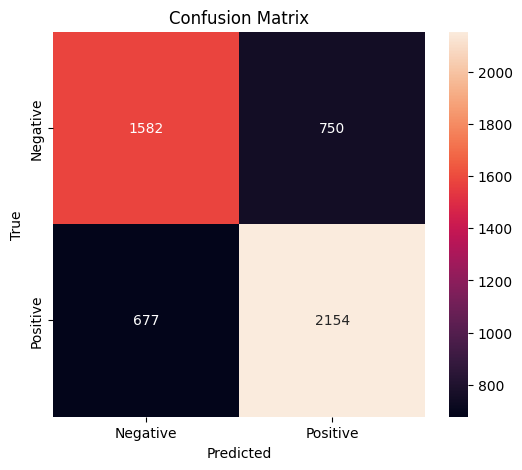

Brier Score Loss: 0.182
AUROC: 0.720
AUPRC: 0.819


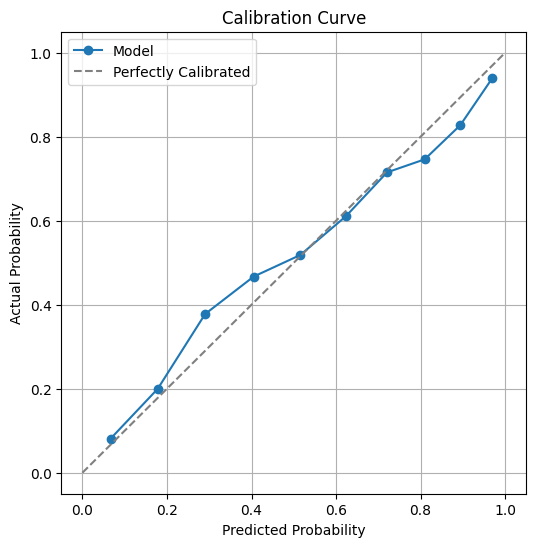

Best Parameters: {'C': 10}


/var/folders/tx/69fsckhn3lgch43zclrrszxw0000gn/T/ipykernel_80715/1865944266.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Logistic Regression - uncalibrated train'])])


In [24]:
# Train Logistic Regression -- get the results and metrics from the model
results['Logistic Regression'], metrics = model_train(LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42), param_grids['Logistic Regression'], X_train, X_val, y_train, y_val)

# Add the evaluation results to the dataframe
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Logistic Regression - uncalibrated train'])])
print(f"Best Parameters: {results['Logistic Regression']['best_params']}")

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      2366
           1       0.73      0.78      0.75      2797

    accuracy                           0.73      5163
   macro avg       0.73      0.72      0.72      5163
weighted avg       0.73      0.73      0.73      5163



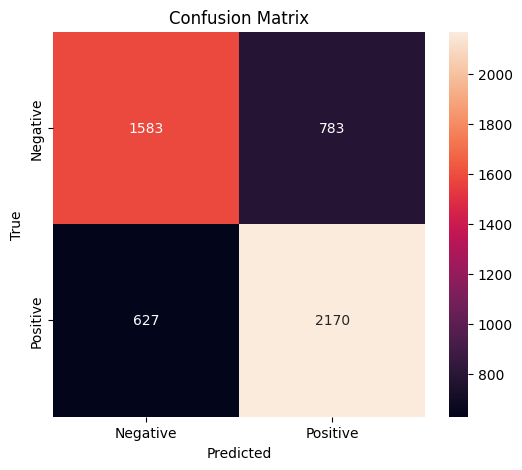

Brier Score Loss: 0.180
AUROC: 0.722
AUPRC: 0.824


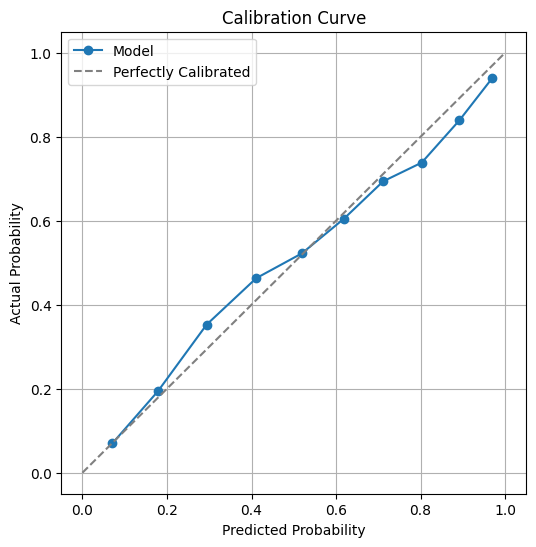

In [26]:
# Test the logistic regression on the test set
lr = results['Logistic Regression']['model']
y_preds_lr = lr.predict(X_test)
y_probs_lr = lr.predict_proba(X_test)[:,1]

# Save the results in the eval_results dataframe 
metrics_lr = model_evaluation(y_test, y_preds_lr, y_probs_lr)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_lr], index=['Logistic Regression - uncalibrated test'])])

In [28]:
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7236,0.7417,0.7609,0.7512,0.1821,0.7196,0.8192,0.0373
Logistic Regression - uncalibrated test,0.7269,0.7348,0.7758,0.7548,0.1797,0.7224,0.8237,0.0316


#### 2. Random Forest

In [ ]:
# Train Random Forest
results['Random Forest'], metrics  = model_train(RandomForestClassifier(random_state=42), param_grids['Random Forest'], X_train, X_val, y_train, y_val)

# Add the evaluation results to the dataframe
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Random Forest - uncalibrated train'])])
print(f"Best Parameters: {results['Random Forest']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67      2366
           1       0.71      0.83      0.76      2797

    accuracy                           0.72      5163
   macro avg       0.73      0.71      0.72      5163
weighted avg       0.73      0.72      0.72      5163



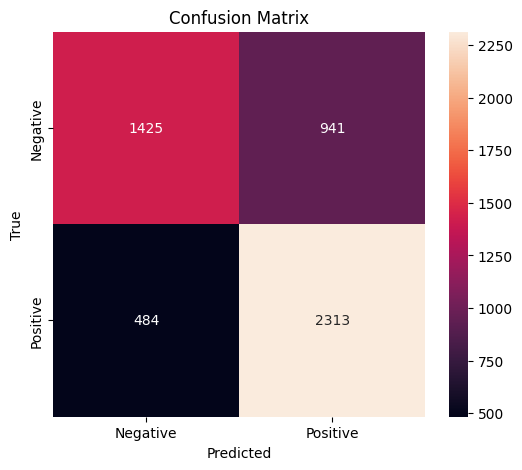

Brier Score Loss: 0.196
AUROC: 0.715
AUPRC: 0.799


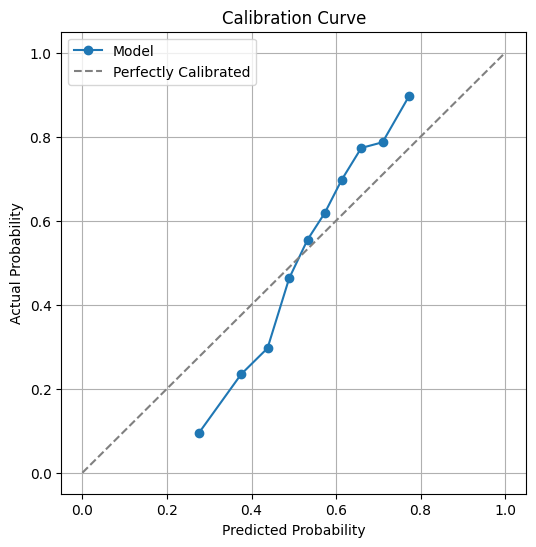

In [26]:
# Test the random forest on the test set
rf = results['Random Forest']['model']
y_preds_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)[:,1]

# Save the results in eval_results
metrics_rf = model_evaluation(y_test, y_preds_rf, y_probs_rf)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_rf], index=['Random Forest - uncalibrated test'])])

In [27]:
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7236,0.7417,0.7609,0.7512,0.1821,0.7196,0.8191,0.0375
Logistic Regression - uncalibrated test,0.7261,0.7342,0.7751,0.7541,0.1797,0.7217,0.8236,0.0315
Random Forest - uncalibrated train,0.7201,0.7152,0.8135,0.7612,0.1958,0.7101,0.7981,0.0643
Random Forest - uncalibrated test,0.7240,0.7108,0.8270,0.7645,0.1963,0.7146,0.7992,0.0636


#### 3. XGBoost

C:\Users\JUAQUIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Classification report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      2332
           1       0.74      0.81      0.77      2831

    accuracy                           0.74      5163
   macro avg       0.74      0.73      0.74      5163
weighted avg       0.74      0.74      0.74      5163



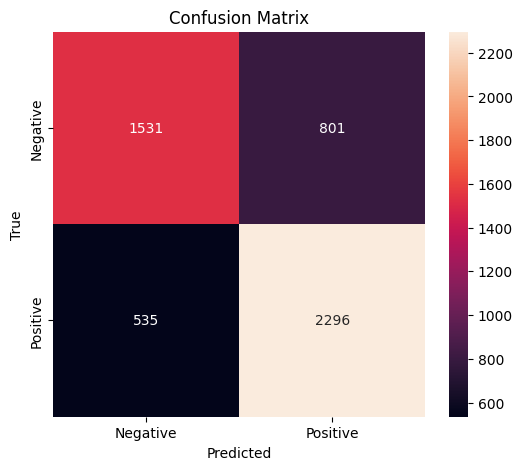

Brier Score Loss: 0.191
AUROC: 0.734
AUPRC: 0.836


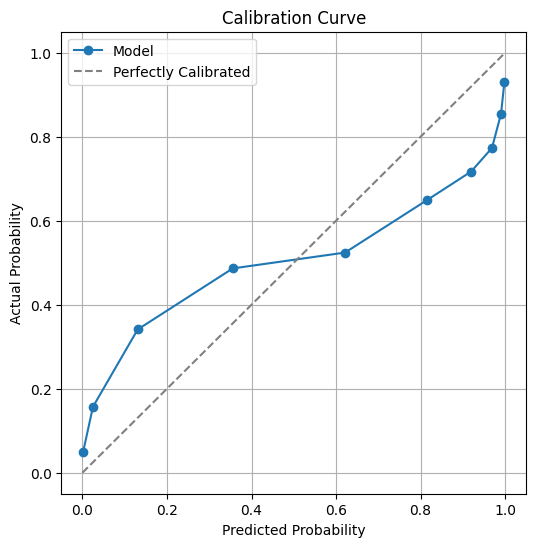

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}


In [28]:
# Train XGBoost
results['XGBoost'], metrics  = model_train(XGBClassifier(objective="binary:logistic", eval_metric='logloss', random_state=42), param_grids['XGBoost'], X_train, X_val, y_train, y_val)

# Save the results in the eval_results df
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['XGBoost - uncalibrated train'])])
print(f"Best Parameters: {results['XGBoost']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      2366
           1       0.74      0.82      0.78      2797

    accuracy                           0.75      5163
   macro avg       0.75      0.74      0.74      5163
weighted avg       0.75      0.75      0.75      5163



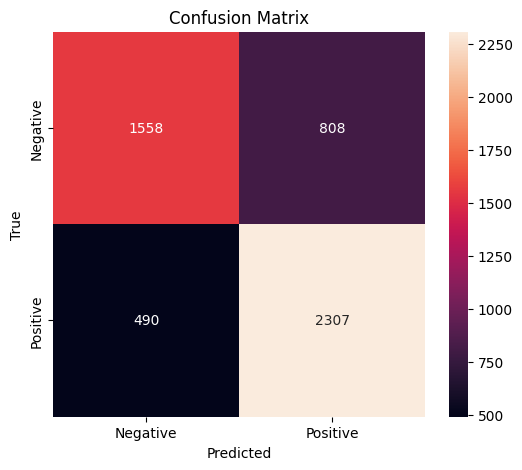

Brier Score Loss: 0.187
AUROC: 0.742
AUPRC: 0.845


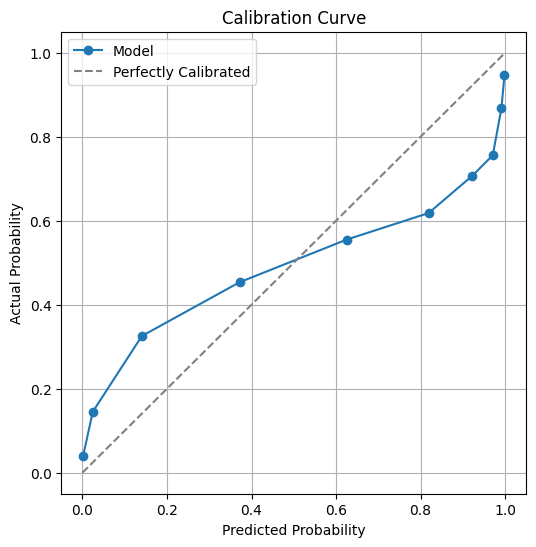

In [29]:
# Test the XGBoost performance on the test set
xgb = results['XGBoost']['model']
y_preds_xgb = xgb.predict(X_test)
y_probs_xgb = xgb.predict_proba(X_test)[:,1]

# Save the results in the eval_results dataframe
metrics_xgb = model_evaluation(y_test, y_preds_xgb, y_probs_xgb)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_xgb], index=['XGBoost - uncalibrated test'])])


In [30]:
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7236,0.7417,0.7609,0.7512,0.1821,0.7196,0.8191,0.0375
Logistic Regression - uncalibrated test,0.7261,0.7342,0.7751,0.7541,0.1797,0.7217,0.8236,0.0315
Random Forest - uncalibrated train,0.7201,0.7152,0.8135,0.7612,0.1958,0.7101,0.7981,0.0643
Random Forest - uncalibrated test,0.7240,0.7108,0.8270,0.7645,0.1963,0.7146,0.7992,0.0636
XGBoost - uncalibrated train,0.7412,0.7414,0.8110,0.7746,0.1907,0.7338,0.8355,0.0985
XGBoost - uncalibrated test,0.7486,0.7406,0.8248,0.7804,0.1873,0.7417,0.8450,0.0872


In [31]:
#import pickle

# Save the trained XGBoost model
# with open("xgboost_model.pkl", "wb") as file:
#    pickle.dump(results['XGBoost']['model'], file)

#### 4. AdaBoost

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68      2332
           1       0.74      0.77      0.75      2831

    accuracy                           0.72      5163
   macro avg       0.72      0.72      0.72      5163
weighted avg       0.72      0.72      0.72      5163



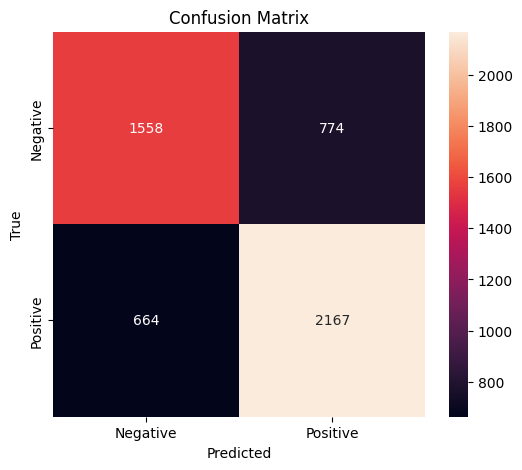

Brier Score Loss: 0.236
AUROC: 0.717
AUPRC: 0.814


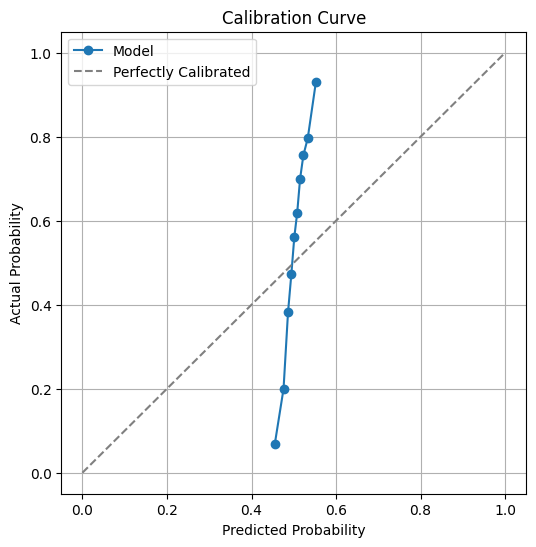

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 1000}


In [32]:
# Train AdaBoost on train/eval set
results['AdaBoost'], metrics  = model_train(AdaBoostClassifier(algorithm="SAMME", random_state=42), param_grids['AdaBoost'], X_train, X_val, y_train, y_val)

# Save the results in the eval_results df
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['AdaBoost - uncalibrated train'])])
print(f"Best Parameters: {results['AdaBoost']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69      2366
           1       0.73      0.77      0.75      2797

    accuracy                           0.72      5163
   macro avg       0.72      0.72      0.72      5163
weighted avg       0.72      0.72      0.72      5163



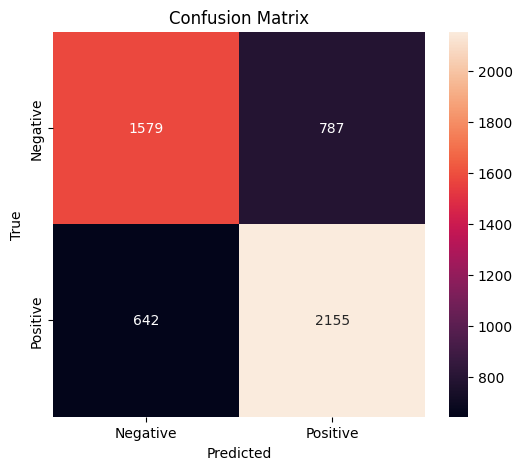

Brier Score Loss: 0.236
AUROC: 0.719
AUPRC: 0.817


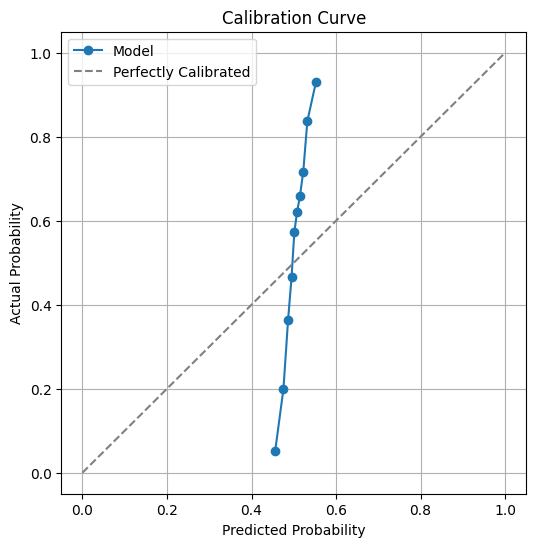

In [33]:
# Test AdaBoost on test set
ab = results['AdaBoost']['model']
y_preds_ab = ab.predict(X_test)
y_probs_ab = ab.predict_proba(X_test)[:,1]

# Add the results to the eval_results dataframe
metrics_ab = model_evaluation(y_test, y_preds_ab, y_probs_ab)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_ab], index=['AdaBoost - uncalibrated test'])])

In [34]:
# Final results for uncalibrated models
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7236,0.7417,0.7609,0.7512,0.1821,0.7196,0.8191,0.0375
Logistic Regression - uncalibrated test,0.7261,0.7342,0.7751,0.7541,0.1797,0.7217,0.8236,0.0315
Random Forest - uncalibrated train,0.7201,0.7152,0.8135,0.7612,0.1958,0.7101,0.7981,0.0643
Random Forest - uncalibrated test,0.7240,0.7108,0.8270,0.7645,0.1963,0.7146,0.7992,0.0636
XGBoost - uncalibrated train,0.7412,0.7414,0.8110,0.7746,0.1907,0.7338,0.8355,0.0985
XGBoost - uncalibrated test,0.7486,0.7406,0.8248,0.7804,0.1873,0.7417,0.8450,0.0872
AdaBoost - uncalibrated train,0.7215,0.7368,0.7655,0.7509,0.2364,0.7168,0.8137,0.0885
AdaBoost - uncalibrated test,0.7232,0.7325,0.7705,0.7510,0.2364,0.7189,0.8167,0.0947


### Calibration

In [35]:
from sklearn.calibration import CalibratedClassifierCV

#### Logistic Regression Calibration

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      2366
           1       0.73      0.79      0.76      2797

    accuracy                           0.73      5163
   macro avg       0.73      0.72      0.72      5163
weighted avg       0.73      0.73      0.72      5163



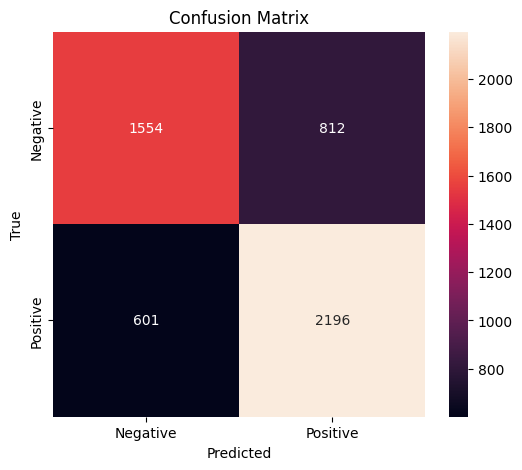

Brier Score Loss: 0.179
AUROC: 0.721
AUPRC: 0.824


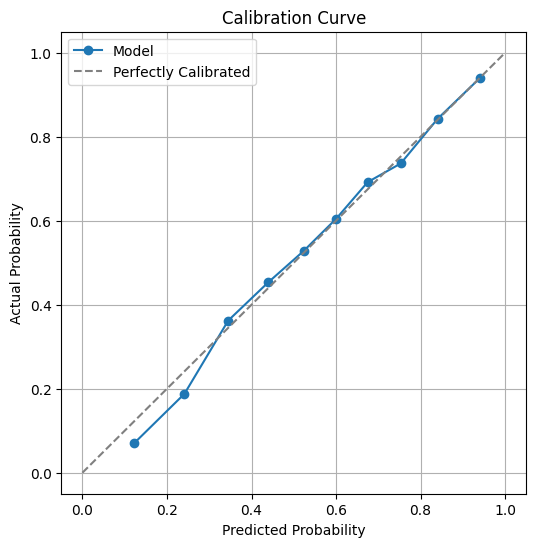

In [36]:
# Calibrate the Logistic Regression 
calibrated_lr = CalibratedClassifierCV(results['Logistic Regression']['model'], method="sigmoid", cv='prefit')  # Platt Scaling
calibrated_lr.fit(X_val, y_val)

y_preds_lr_cal = calibrated_lr.predict(X_test)
y_probs_lr_cal = calibrated_lr.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and add the results to the eval_results df
metrics_calibrated_lr = model_evaluation(y_test, y_preds_lr_cal, y_probs_lr_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_lr], index=['Logistic Regression - calibrated'])])

#### Random Forest Calibration

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      2366
           1       0.73      0.78      0.75      2797

    accuracy                           0.72      5163
   macro avg       0.72      0.72      0.72      5163
weighted avg       0.72      0.72      0.72      5163



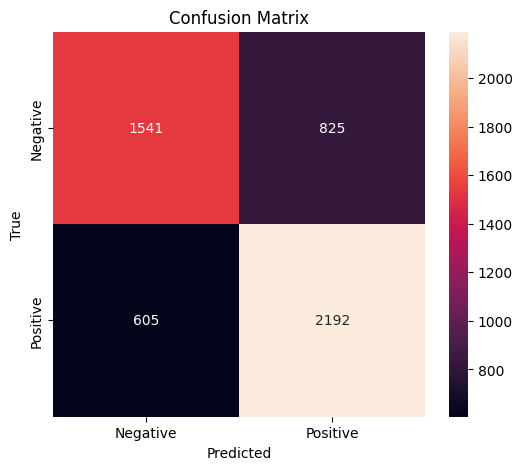

Brier Score Loss: 0.185
AUROC: 0.718
AUPRC: 0.799


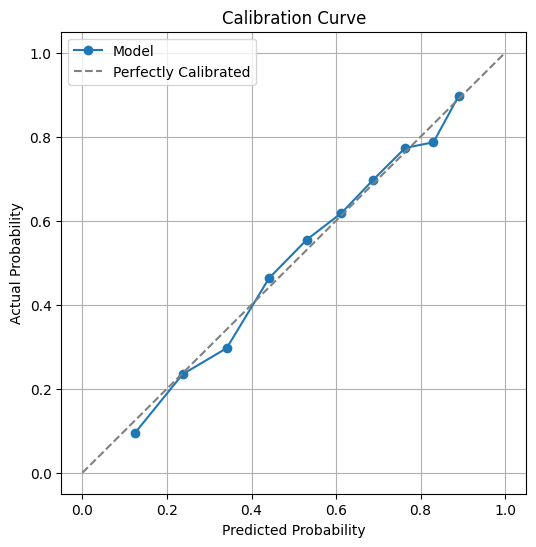

In [37]:
# Calibrate the Random Forest
calibrated_rf = CalibratedClassifierCV(results['Random Forest']['model'], method="sigmoid", cv='prefit')   
calibrated_rf.fit(X_val, y_val)

y_preds_rf_cal = calibrated_rf.predict(X_test)
y_probs_rf_cal = calibrated_rf.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and save the results 
metrics_calibrated_rf = model_evaluation(y_test, y_preds_rf_cal, y_probs_rf_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_rf], index=['Random Forest - calibrated'])])

#### XGBoost Calibration

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      2366
           1       0.74      0.82      0.78      2797

    accuracy                           0.75      5163
   macro avg       0.75      0.74      0.74      5163
weighted avg       0.75      0.75      0.75      5163



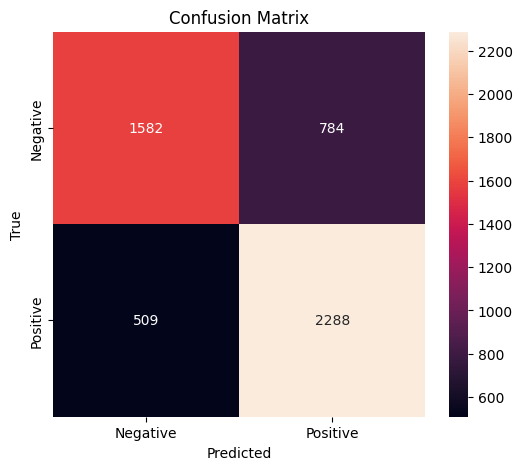

Brier Score Loss: 0.173
AUROC: 0.743
AUPRC: 0.845


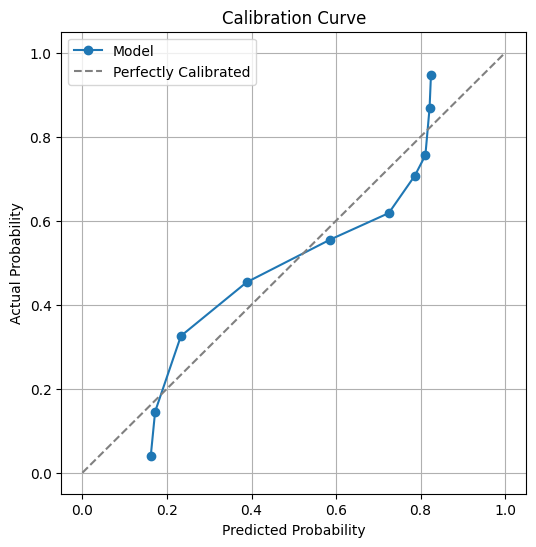

In [38]:
# Calibrate the XGBoost
calibrated_xgb = CalibratedClassifierCV(results['XGBoost']['model'], method="sigmoid", cv='prefit')   
calibrated_xgb.fit(X_val, y_val)

y_preds_xgb_cal = calibrated_xgb.predict(X_test)
y_probs_xgb_cal = calibrated_xgb.predict_proba(X_test)[:,1]

# Evaluate the calibrated XGBoost performance and add the results to the dataframe
metrics_calibrated_xgb = model_evaluation(y_test, y_preds_xgb_cal, y_probs_xgb_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_xgb], index=['XGBoost - calibrated'])])

#### Adaboost Calibration

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      2366
           1       0.73      0.78      0.75      2797

    accuracy                           0.72      5163
   macro avg       0.72      0.72      0.72      5163
weighted avg       0.72      0.72      0.72      5163



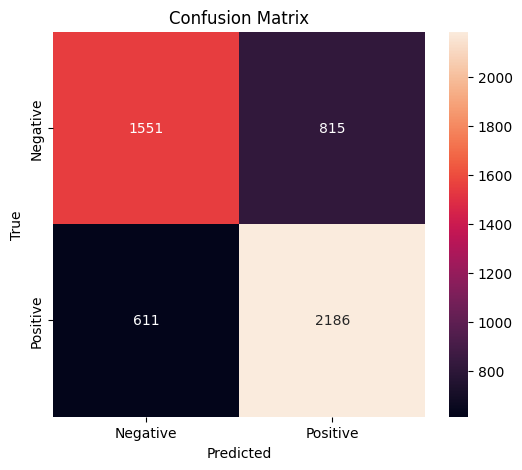

Brier Score Loss: 0.180
AUROC: 0.719
AUPRC: 0.817


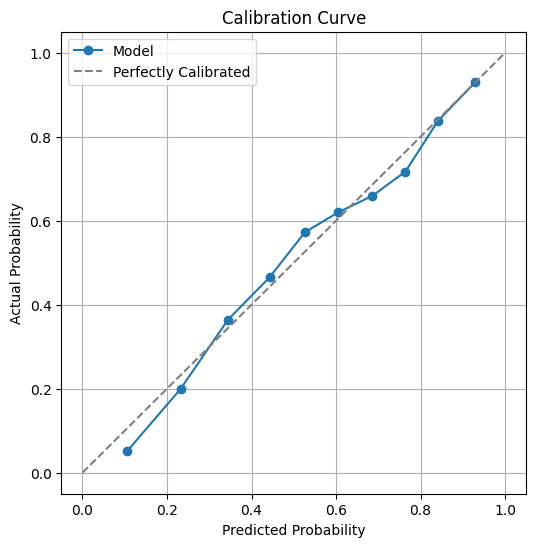

In [39]:
# Calibrate AdaBoost
calibrated_ab = CalibratedClassifierCV(results['AdaBoost']['model'], method="sigmoid", cv='prefit') 
calibrated_ab.fit(X_val, y_val)

y_preds_ab_cal = calibrated_ab.predict(X_test)
y_probs_ab_cal = calibrated_ab.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and add the results to the dataframe eval_results
metrics_calibrated_ab = model_evaluation(y_test, y_preds_ab_cal, y_probs_ab_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_ab], index=['AdaBoost - calibrated'])])

In [40]:
# Final calibrated results
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7236,0.7417,0.7609,0.7512,0.1821,0.7196,0.8191,0.0375
Logistic Regression - uncalibrated test,0.7261,0.7342,0.7751,0.7541,0.1797,0.7217,0.8236,0.0315
Random Forest - uncalibrated train,0.7201,0.7152,0.8135,0.7612,0.1958,0.7101,0.7981,0.0643
Random Forest - uncalibrated test,0.7240,0.7108,0.8270,0.7645,0.1963,0.7146,0.7992,0.0636
XGBoost - uncalibrated train,0.7412,0.7414,0.8110,0.7746,0.1907,0.7338,0.8355,0.0985
XGBoost - uncalibrated test,0.7486,0.7406,0.8248,0.7804,0.1873,0.7417,0.8450,0.0872
AdaBoost - uncalibrated train,0.7215,0.7368,0.7655,0.7509,0.2364,0.7168,0.8137,0.0885
AdaBoost - uncalibrated test,0.7232,0.7325,0.7705,0.7510,0.2364,0.7189,0.8167,0.0947
Logistic Regression - calibrated,0.7263,0.7301,0.7851,0.7566,0.1788,0.7210,0.8236,0.0147
Random Forest - calibrated,0.7230,0.7265,0.7837,0.7540,0.1850,0.7175,0.7992,0.0206


#### Feature Importance

In [41]:
# The best performing model is XGBoost calibrated, so we are going to calculate the feature importance on this model

#### Random Forest

In [42]:
rf_base_model = results['Random Forest']['model']
mdi_importance = rf_base_model.feature_importances_

# Create a DataFrame for feature importance
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'MDI': mdi_importance})
top_features = importance_df.sort_values(by='MDI', ascending=False).head(10)
top_features


,Feature,MDI
205,EU OBSERVATION,0.023354
61,sodium chloride 0.9% flush Sum,0.021287
12,bisacodyl Sum,0.013176
23,furosemide Sum,0.012525
129,sodium chloride 0.9% flush Average,0.011777
80,bisacodyl Average,0.011370
91,furosemide Average,0.010452
203,DIRECT OBSERVATION,0.007364
2,lengths_of_1st_admission,0.005805
132,sw Average,0.005469


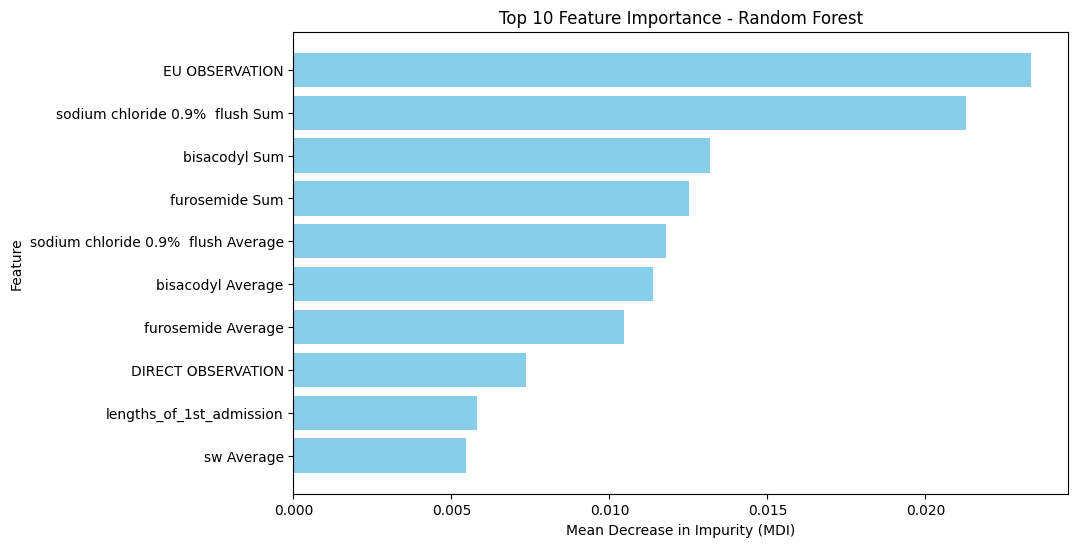

In [43]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['MDI'], color='skyblue')
plt.xlabel('Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

#### XGBoost

In [44]:
# Get the base estimator for XGBoost
xgb_base_model = calibrated_xgb.calibrated_classifiers_[0].estimator

# Get feature importance using "gain" (Mean Decrease in Impurity equivalent for XGBoost)
xgb_importance = xgb_base_model.get_booster().get_score(importance_type='gain')

In [45]:
xgb_importance_df = pd.DataFrame(xgb_importance.items(), columns=['Feature', 'Gain'])
xgb_importance_df = xgb_importance_df.sort_values(by='Gain', ascending=False).head(10)

xgb_importance_df

,Feature,Gain
41,sodium chloride 0.9% flush Sum,22.523329
108,EU OBSERVATION,14.705220
113,sum_drg_severity,12.003496
106,DIRECT OBSERVATION,10.828726
12,fluoxetine Sum,10.341301
75,"Chronic obstructive pulmonary disease, unspeci...",9.998420
7,bisacodyl Sum,9.254598
6,aspirin ec Sum,8.835322
89,"Major depressive disorder, single episode, uns...",8.792587
85,Hyposmolality and/or hyponatremia,7.999445


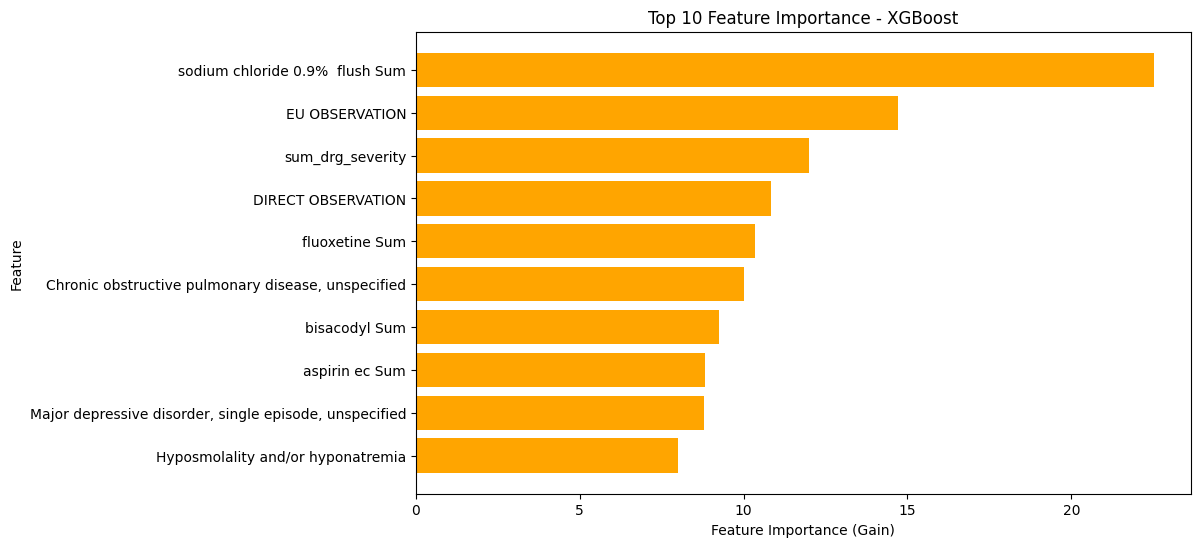

In [46]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Gain'], color='orange')
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()